In [1]:
import re
import unicodedata
import pandas as pd
import nltk
from wordcloud import WordCloud
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

import env
import acquire
import prepare

In [26]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

1) Spam Data

a) Load the spam data set.

In [2]:
url = env.get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


b) Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [3]:
df = prepare.prep_text(df, 'text')
df

,label,text,clean,stemmed,lemmatized
id,,,,,
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,free entri 2 wkli comp win fa cup final tkt 21...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though,nah dont think goe usf live around though,nah dont think go usf life around though
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u a750 pound prize ...,2nd time tri 2 contact u u a750 pound prize 2 ...,2nd time tried 2 contact u u a750 pound prize ...
5568,ham,Will Ì_ b going to esplanade fr home?,b going esplanade fr home,b go esplanad fr home,b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestions,piti mood soani suggest,pity mood soany suggestion


In [4]:
#split the dataframe into spam and ham text
spam = df[df.label == 'spam']
ham = df[df.label == 'ham']

#Join them all into one string
spam_words = ' '.join(spam.lemmatized)
ham_words = ' '.join(ham.lemmatized)

#Create bigrams for both the spam and ham messages
spam_bigrams = pd.Series(nltk.ngrams(spam_words.split(), 2))
ham_bigrams = pd.Series(nltk.ngrams(ham_words.split(), 2))

top_20_spam_bigrams = spam_bigrams.value_counts().head(20).sort_values(ascending = False)

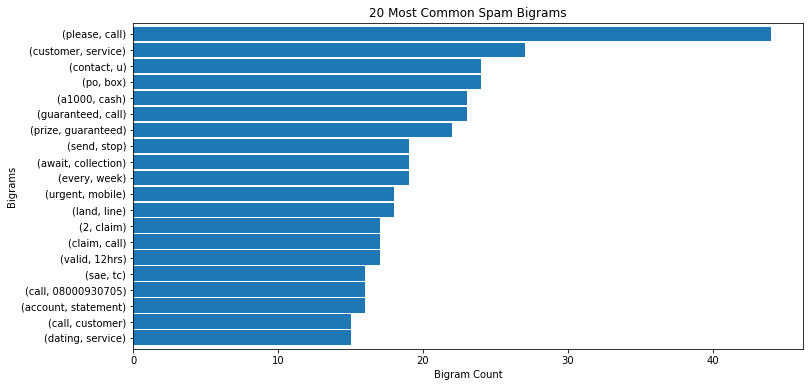

In [5]:
# Visualize the top 20 spam bigrams
top_20_spam_bigrams.sort_values().plot.barh(width = .9, figsize = (12,6))
plt.xlabel('Bigram Count')
plt.ylabel('Bigrams')
plt.title('20 Most Common Spam Bigrams')
plt.show()

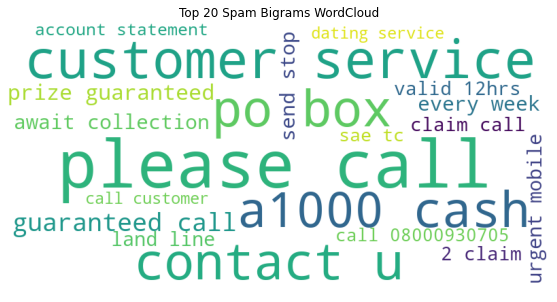

In [6]:
#Generate a wordcloud

#First create a dictionary for the fequencies of the bigrams
data = {k[0] + ' ' + k[1]: count for k, count in top_20_spam_bigrams.to_dict().items()}

#Create the wordcloud
#Change the figsize before creating the wordcloud
plt.figure(figsize=(10, 5))
image = WordCloud(background_color = 'white', width = 800, height = 400).generate_from_frequencies(data)
plt.title('Top 20 Spam Bigrams WordCloud')
plt.imshow(image)
plt.axis('off')
plt.show()

In [7]:
top_20_ham_bigrams = ham_bigrams.value_counts().head(20).sort_values(ascending = False)
top_20_ham_bigrams

(call, later)      52
(ill, call)        48
(let, know)        41
(sorry, ill)       39
(r, u)             37
(u, r)             34
(dont, know)       32
(good, morning)    31
(wan, 2)           31
(new, year)        30
(take, care)       26
(im, going)        24
(u, get)           23
(u, wan)           23
(ok, lor)          22
(pls, send)        22
(im, gonna)        20
(happy, new)       19
(good, night)      19
(ltgt, min)        19
dtype: int64

In [8]:
# Create dataframe to explore ham bigrams
top_20_ham_bigrams = ham_bigrams.value_counts().head(20).sort_values(ascending = False)
top_20_ham_bigrams

(call, later)      52
(ill, call)        48
(let, know)        41
(sorry, ill)       39
(r, u)             37
(u, r)             34
(dont, know)       32
(good, morning)    31
(wan, 2)           31
(new, year)        30
(take, care)       26
(im, going)        24
(u, get)           23
(u, wan)           23
(ok, lor)          22
(pls, send)        22
(im, gonna)        20
(happy, new)       19
(good, night)      19
(ltgt, min)        19
dtype: int64

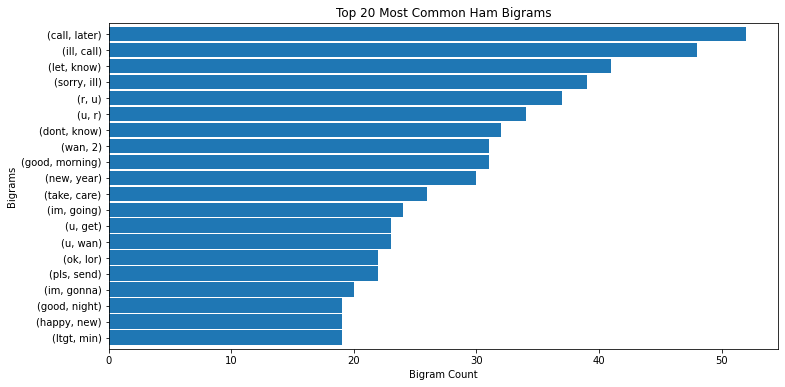

In [9]:
#Visualization the ham bigrams
top_20_ham_bigrams.sort_values().plot.barh(width = 0.9, figsize = (12,6))
plt.title('Top 20 Most Common Ham Bigrams')
plt.xlabel('Bigram Count')
plt.ylabel('Bigrams')
plt.show()

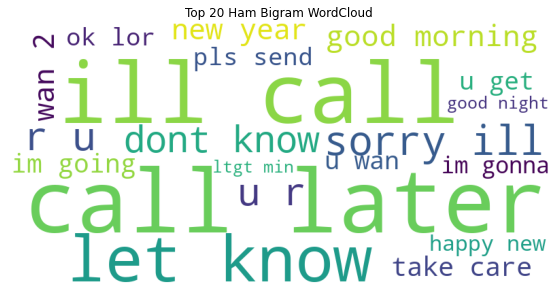

In [10]:
#Create a word cloud of the ham bigrams
#Create dictionary for the frequencies
data = {k[0] + ' ' + k[1]: count for k, count in top_20_ham_bigrams.to_dict().items()}

#change the figsize before creating the wordcloud
plt.figure(figsize=(10,5))
image = WordCloud(background_color = 'white', width= 800, height = 400).generate_from_frequencies(data)
plt.title('Top 20 Ham Bigram WordCloud')
plt.imshow(image)
plt.axis('off')
plt.show()


c) Is there any overlap in the bigrams for the spam data and the ham data?



No but the word call appears frequently in both


d) Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [11]:
spam_trigrams = pd.Series(nltk.ngrams(spam_words.split(), 3))
ham_trigrams = pd.Series(nltk.ngrams(ham_words.split(), 3))

#Find the top 20 spam and ham trigrams
top_20_spam_trigrams = spam_trigrams.value_counts().head(20)
top_20_ham_trigrams = ham_trigrams.value_counts().head(20)

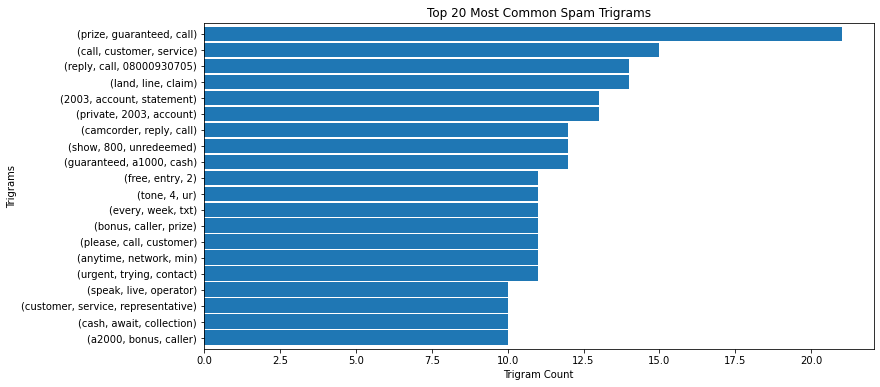

In [12]:
#Visualize the top 20 spam trigrams
top_20_spam_trigrams.sort_values().plot.barh(width = 0.9, figsize=(12,6))
plt.title('Top 20 Most Common Spam Trigrams')
plt.xlabel('Trigram Count')
plt.ylabel('Trigrams')
plt.show()

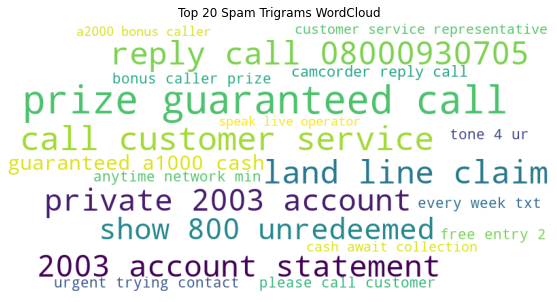

In [13]:
#Create a wordcloud for the spam trigrams
#Create the dictionary for the frequencies
data = {k[0] + ' ' + k[1] + ' ' + k[2]: count for k, count in top_20_spam_trigrams.to_dict().items()}


plt.figure(figsize=(10,5))
image = WordCloud(background_color = 'white', width = 800, height = 400).generate_from_frequencies(data)
plt.title('Top 20 Spam Trigrams WordCloud')
plt.imshow(image)
plt.axis('off')
plt.show()

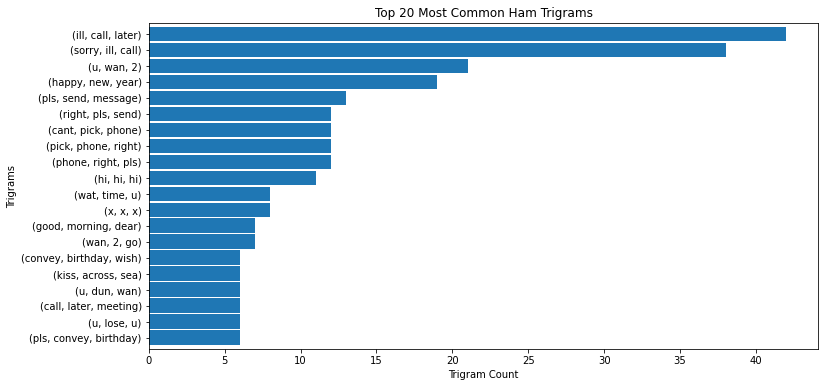

In [14]:
#Create visualizations for the ham trigrams
top_20_ham_trigrams.sort_values().plot.barh(width=0.9, figsize=(12,6))
plt.title('Top 20 Most Common Ham Trigrams')
plt.xlabel('Trigram Count')
plt.ylabel('Trigrams')
plt.show()

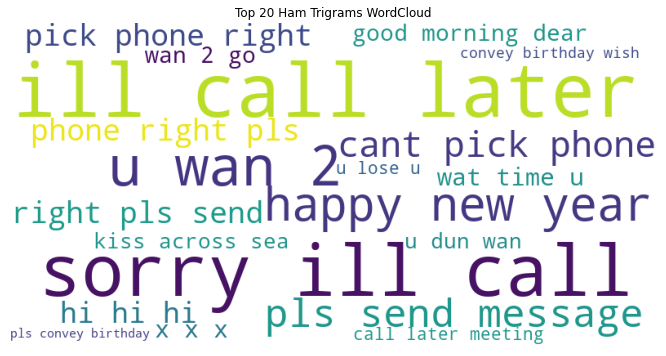

In [15]:
#Create the ham trigram wordcloud

#First create the dictionary for the frequencies
data = {k[0] + ' ' + k[1] + ' ' + k[2]: count for k, count in top_20_ham_trigrams.to_dict().items()}

#Create the image
plt.figure(figsize=(12,6))
image = WordCloud(background_color = 'white', width = 800, height = 400).generate_from_frequencies(data)
plt.title('Top 20 Ham Trigrams WordCloud')
plt.imshow(image)
plt.axis('off')
plt.show()

2. Explore the blog articles using the techniques discussed in the exploration lesson.


In [17]:
# acquire
codeup_df = acquire.get_blog_articles()
codeup_df

,title,date,category,content
0,In-Person Workshop: Learn to Code – JavaScript...,"Jul 6, 2022",San Antonio,Join us for our live in-person JavaScript cras...
1,In-Person Workshop: Learn to Code – Python on ...,"Jun 20, 2022",San Antonio,"According to LinkedIn, the “#1 Most Promising ..."
2,Free JavaScript Workshop at Codeup Dallas on 6/28,"Jun 19, 2022",Dallas,Event Info: Location – Codeup Dallas Time – 6...
3,Is Our Cloud Administration Program Right for ...,"Jun 8, 2022",Featured,Changing careers can be scary. The first thing...
4,PRIDE in Tech Panel,"Jun 5, 2022",Dallas,"In celebration of PRIDE month, join our Codeup..."
5,Inclusion at Codeup During Pride Month (and Al...,"Jun 1, 2022",Codeup News,Happy Pride Month! Pride Month is a dedicated ...
6,Mental Health First Aid Training,"May 31, 2022",Tips for Prospective Students,"As a student of Codeup, going through a massiv..."
7,Codeup Dallas: How to Succeed at a Coding Boot...,"May 23, 2022",Dallas,This event is the perfect opportunity for peop...
8,5 Reasons To Attend Our New Cloud Administrati...,"May 17, 2022",Codeup News,Come Work In The Cloud When your Monday rolls ...
9,Learn to Code: Python on 5/21,"May 16, 2022",Events,"According to LinkedIn, the “#1 Most Promising ..."


In [19]:
# renaming column name
codeup_df.rename(columns={'content':'original'}, inplace=True)

df = prepare.prep_article_data(codeup_df,'original', extra_words=['ha'],exclude_words=['no'])
df

,title,original,clean,stemmed,lemmatized
0,In-Person Workshop: Learn to Code – JavaScript...,Join us for our live in-person JavaScript cras...,join us live inperson javascript crash course ...,join us live inperson javascript crash cours d...,join u live inperson javascript crash course d...
1,In-Person Workshop: Learn to Code – Python on ...,"According to LinkedIn, the “#1 Most Promising ...",according linkedin 1 promising job data scienc...,accord linkedin 1 promis job data scienc one m...,according linkedin 1 promising job data scienc...
2,Free JavaScript Workshop at Codeup Dallas on 6/28,Event Info: Location – Codeup Dallas Time – 6...,event info location codeup dallas time 6 pm co...,event info locat codeup dalla time 6 pm come l...,event info location codeup dallas time 6 pm co...
3,Is Our Cloud Administration Program Right for ...,Changing careers can be scary. The first thing...,changing careers scary first thing may asking ...,chang career scari first thing may ask begin l...,changing career scary first thing may asking b...
4,PRIDE in Tech Panel,"In celebration of PRIDE month, join our Codeup...",celebration pride month join codeup alumni lgb...,celebr pride month join codeup alumni lgbtqia ...,celebration pride month join codeup alumnus lg...
5,Inclusion at Codeup During Pride Month (and Al...,Happy Pride Month! Pride Month is a dedicated ...,happy pride month pride month dedicated time c...,happi pride month pride month dedic time celeb...,happy pride month pride month dedicated time c...
6,Mental Health First Aid Training,"As a student of Codeup, going through a massiv...",student codeup going massive career transition...,student codeup go massiv career transit mental...,student codeup going massive career transition...
7,Codeup Dallas: How to Succeed at a Coding Boot...,This event is the perfect opportunity for peop...,event perfect opportunity people wondering exp...,event perfect opportun peopl wonder expect cod...,event perfect opportunity people wondering exp...
8,5 Reasons To Attend Our New Cloud Administrati...,Come Work In The Cloud When your Monday rolls ...,come work cloud monday rolls around start get ...,come work cloud monday roll around start get s...,come work cloud monday roll around start get s...
9,Learn to Code: Python on 5/21,"According to LinkedIn, the “#1 Most Promising ...",according linkedin 1 promising job data scienc...,accord linkedin 1 promis job data scienc one m...,according linkedin 1 promising job data scienc...


In [27]:
df['words'] = df.original.apply(clean)

In [28]:
all_words = ' '.join(df.words.apply(' '.join))
# Most common 15 words
pd.Series(all_words.split()).value_counts().head(15)

cloud             62
career            35
codeup            29
program           27
new               22
student           21
like              20
data              19
also              19
learn             18
administration    17
get               17
need              17
tech              17
campus            16
dtype: int64

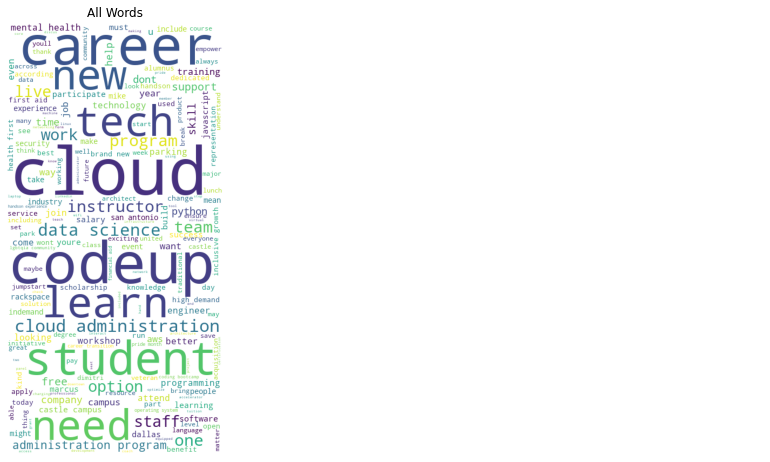

In [32]:
all_cloud = WordCloud(background_color='white', height=800, width=400).generate((all_words))

plt.figure(figsize=(12, 6))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)


axs[0].set_title('All Words')


for ax in axs: ax.axis('off')

<AxesSubplot:>

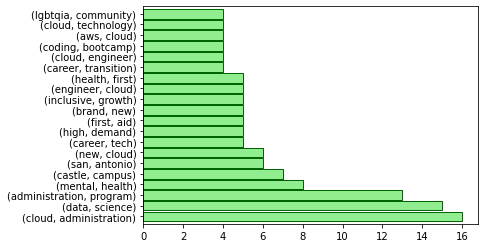

In [33]:
(
    df.words.apply(nltk.bigrams)
    .apply(pd.Series)
    .stack()
    .reset_index(drop=True)
    .value_counts()
    .head(20)
    .plot.barh(width=.9, ec='darkgreen', color='lightgreen')
)

3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [35]:
news_df = acquire.get_news_articles()
news_df

,title,content,author,date,source,category
0,Rupee hits record low of 79.97 against US dollar,The rupee hit a record low of 79.97 against th...,Ridham Gambhir,18 Jul,NaN,business
1,Rupee closes at an all-time low of 79.98 again...,The rupee on Monday hit a fresh record low as ...,Ridham Gambhir,18 Jul,NaN,business
2,A fighter to the core: Mahindra praises PV Sin...,Businessman Anand Mahindra took to Twitter to ...,Ridham Gambhir,17 Jul,NaN,business
3,"BCCI had ₹40 cr in bank when I joined & ₹47,68...","In an Instagram post, Lalit Modi asserted that...",Ridham Gambhir,17 Jul,NaN,business
4,11 SEBI officials' email accounts hacked & use...,Mumbai police has filed an FIR after the Secur...,Hiral Goyal,17 Jul,NaN,business
...,...,...,...,...,...,...
95,"Some pap pics look vulgar, then people charact...",Actress Janhvi Kapoor has stated that sometime...,Kriti Kambiri,18 Jul,NaN,entertainment
96,Excited to announce my next film starring Kart...,Filmmaker Kabir Khan took to Instagram to anno...,Amartya Sharma,18 Jul,NaN,entertainment
97,"Kajol to make web series debut, says 'Love to ...",Kajol is set to make her web series debut with...,Udit Gupta,18 Jul,NaN,entertainment
98,Ranbir always caught my attention with his wor...,'Shamshera' director Karan Malhotra has said t...,Amartya Sharma,18 Jul,NaN,entertainment


In [47]:
#categories chosen
categories = ['world', 'science', 'technology', 'entertainment']

# renaming column name
news_df.rename(columns={'content':'original'},inplace=True)

df = prepare.prep_article_data(news_df,'original', extra_words=['ha'],exclude_words=['no'])
df

,title,original,clean,stemmed,lemmatized
0,Rupee hits record low of 79.97 against US dollar,The rupee hit a record low of 79.97 against th...,rupee hit record low 7997 us dollar monday ope...,rupe hit record low 7997 us dollar monday open...,rupee hit record low 7997 u dollar monday open...
1,Rupee closes at an all-time low of 79.98 again...,The rupee on Monday hit a fresh record low as ...,rupee monday hit fresh record low ended closer...,rupe monday hit fresh record low end closer 80...,rupee monday hit fresh record low ended closer...
2,A fighter to the core: Mahindra praises PV Sin...,Businessman Anand Mahindra took to Twitter to ...,businessman anand mahindra took twitter praise...,businessman anand mahindra took twitter prais ...,businessman anand mahindra took twitter praise...
3,"BCCI had ₹40 cr in bank when I joined & ₹47,68...","In an Instagram post, Lalit Modi asserted that...",instagram post lalit modi asserted neither too...,instagram post lalit modi assert neither took ...,instagram post lalit modi asserted neither too...
4,11 SEBI officials' email accounts hacked & use...,Mumbai police has filed an FIR after the Secur...,mumbai police filed fir securities exchange bo...,mumbai polic file fir secur exchang board indi...,mumbai police filed fir security exchange boar...
...,...,...,...,...,...
95,"Some pap pics look vulgar, then people charact...",Actress Janhvi Kapoor has stated that sometime...,actress janhvi kapoor stated sometimes photos ...,actress janhvi kapoor state sometim photo take...,actress janhvi kapoor stated sometimes photo t...
96,Excited to announce my next film starring Kart...,Filmmaker Kabir Khan took to Instagram to anno...,filmmaker kabir khan took instagram announce u...,filmmak kabir khan took instagram announc upco...,filmmaker kabir khan took instagram announce u...
97,"Kajol to make web series debut, says 'Love to ...",Kajol is set to make her web series debut with...,kajol set make web series debut upcoming proje...,kajol set make web seri debut upcom project sp...,kajol set make web series debut upcoming proje...
98,Ranbir always caught my attention with his wor...,'Shamshera' director Karan Malhotra has said t...,shamshera director karan malhotra said happy g...,shamshera director karan malhotra said happi g...,shamshera director karan malhotra said happy g...


In [49]:
df['words'] = df.original.apply(clean)

all_words = ' '.join(df.words.apply(' '.join))
# Most common 15 words
pd.Series(all_words.split()).value_counts().head(15)

said       59
india      33
added      33
film       25
musk       24
twitter    23
odi        22
england    20
like       19
ceo        18
actor      17
took       14
hardik     13
actress    13
elon       12
dtype: int64

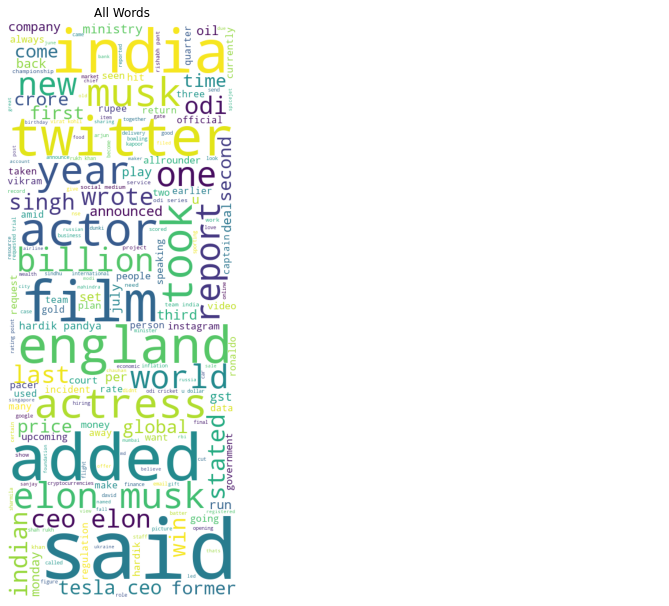

In [50]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate((all_words))

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)


axs[0].set_title('All Words')


for ax in axs: ax.axis('off')

<AxesSubplot:>

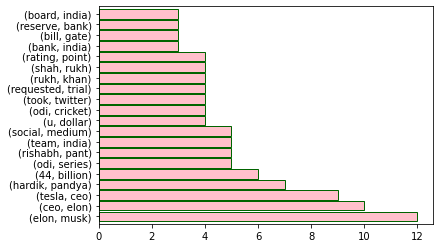

In [51]:
(
    df.words.apply(nltk.bigrams)
    .apply(pd.Series)
    .stack()
    .reset_index(drop=True)
    .value_counts()
    .head(20)
    .plot.barh(width=.9, ec='darkgreen', color='pink')
)